In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
from matplotlib import cm
import matplotlib as mpl
from cycler import cycler
from matplotlib import rc
import scipy.stats
import seaborn as sns

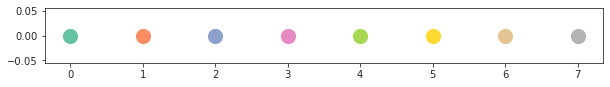

In [11]:
cmap = mpl.cm.get_cmap("Set2")
x = np.arange(0,1,0.01)
cmap_categ_raw = cmap(x)

cmap_categ = []
count = 0
for i in range(cmap_categ_raw.shape[0]):
    if i == 0:
        cmap_categ.append(cmap_categ_raw[i])
    elif np.sum(cmap_categ_raw[i] - cmap_categ[count]) != 0:
        cmap_categ.append(cmap_categ_raw[i])
        count += 1

plt.figure(figsize = (10,1))
for i in range(len(cmap_categ)):
    plt.scatter(i, 0, color=cmap_categ[i], s=200)

## Full Figure

In [12]:
E_neural = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural.npz")[-50000:].toarray()
I_neural = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Ispikes_neural.npz")[-50000:].toarray()

dend = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy").reshape(4,1000,50001)[:,-1,:50000]
soma = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-1,:50000]

clust0 = np.load("/media/hdd01/sklee/CA1_dspike_samples/4clusterOf60_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust1 = np.load("/media/hdd01/sklee/CA1_dspike_samples/8clusterOf30_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust2 = np.load("/media/hdd01/sklee/CA1_dspike_samples/12clusterOf20_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
#clust2 = np.load("/media/hdd01/sklee/CA1_1.5clust12-20/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy").reshape(-1,1000,50001)[:,:10,:50000]
clust3 = np.load("/media/hdd01/sklee/CA1_dspike_samples/24clusterOf10_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust4 = np.load("/media/hdd01/sklee/CA1_dspike_samples/48clusterOf5_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust5 = np.load("/media/hdd01/sklee/CA1_dspike_samples/120clusterOf2_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust6 = np.load("/media/hdd01/sklee/CA1_dspike_samples/240clusterOf1_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]

In [28]:
x_e, y_e = np.where(E_neural > 0)
x_i, y_i = np.where(I_neural > 0)
y_i += 2000
x_e = x_e / 5000
x_i = x_i / 5000

clust_idx = np.where((y_e >= 880) & (y_e < 1120))
x_e_rest = np.delete(x_e, clust_idx)
y_e_rest = np.delete(y_e, clust_idx)
x_e_clust = x_e[clust_idx]
y_e_clust = y_e[clust_idx]

all_dspikes = np.stack((clust0, clust1, clust2, clust3, clust4, clust5, clust6))
dspike_counts = np.zeros((7, 10))

for i in range(all_dspikes.shape[0]):
    for j in range(all_dspikes.shape[1]):
        for k in range(all_dspikes.shape[2]):
            v = all_dspikes[i,j,k]
            raw_idx = np.where(v > -10)[0]
            raw_count = raw_idx.shape[0]
            for s in range(raw_count):
                if s == 0:
                    dspike_counts[i,k] += 1
                elif raw_idx[s] - raw_idx[s-1] > 1:
                    dspike_counts[i,k] += 1
                    
dspike_counts = dspike_counts / 10

/home/sklee/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sklee/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-32-43e9f2c17aac>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


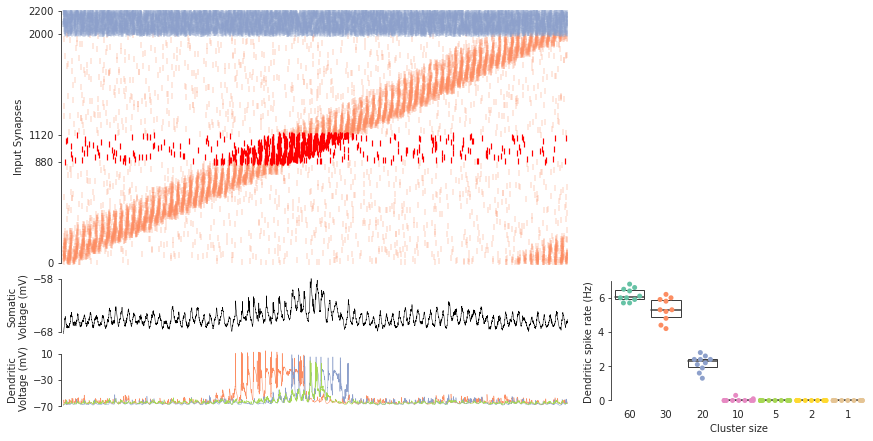

In [32]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

fig = plt.figure(constrained_layout=True, figsize = (12,6))
gs = fig.add_gridspec(6,6, wspace=0.1, hspace=0.)
ax1 = fig.add_subplot(gs[:4, :4])
ax2 = fig.add_subplot(gs[4, :4])
ax3 = fig.add_subplot(gs[5, :4])
ax4 = fig.add_subplot(gs[4:, 4:])

# Ax1: Raster #
ax1.scatter(x=x_e_rest, y=y_e_rest, marker="|", color=cmap_categ[1], linewidth=0.4, s=40)
ax1.scatter(x=x_i, y=y_i, marker="|", color=cmap_categ[2], linewidth=0.4, s=40)
ax1.scatter(x=x_e_clust, y=y_e_clust, marker="|", color="red", linewidth=1.2, s=40)

ax1.margins(x=0.005, y=0.005)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.spines.bottom.set_visible(False)
ax1.spines.left.set_bounds(0,2200)
ax1.spines.bottom.set_bounds(0,10)
ax1.set_xticks([])
ax1.set_ylabel("Input Synapses")
ax1.set_yticks([0,880,1120,2000,2200])

# Ax2: Soma #
ax2.plot(soma, color="black", linewidth=0.5)
ax2.margins(x=0.005, y=0.005)
ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2.spines.left.set_bounds(-68,-58)
ax2.set_yticks([-68,-58])
ax2.set_xticks([])
ax2.set_ylabel("Somatic\nVoltage (mV)")

# Ax3: Dend #
ax3.plot(dend[0], color=cmap_categ[1], linewidth=0.5)
ax3.plot(dend[3], color=cmap_categ[2], linewidth=0.5)
ax3.plot(dend[2], color=cmap_categ[4], linewidth=0.5)

ax3.margins(x=0.005, y=0.005)
ax3.spines.right.set_visible(False)
ax3.spines.top.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.spines.left.set_bounds(-70,10)
ax3.set_xticks([])
ax3.set_yticks([-70,-30,10])
ax3.set_ylabel("Dendritic\nVoltage (mV)")

# Ax4: Spike counts #
sns.set_style("ticks")
x_names = ["60", "30", "20", "10", "5", "2", "1"]
ax4 = sns.swarmplot(data=dspike_counts.T, palette="Set2", s=5)
ax4 = sns.boxplot(data=dspike_counts.T,
        showcaps=False,boxprops={'facecolor':'None', "linewidth":1},
        showfliers=False,whiskerprops={'linewidth':0})

ax4.spines.right.set_visible(False)
ax4.spines.top.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.spines.left.set_bounds(0,7)
ax4.tick_params(axis="x", length=0)
ax4.set_xticklabels(x_names)

ax4.set_xlabel("Cluster size")
ax4.set_ylabel("Dendritic spike rate (Hz)")

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig1/fig1_raw.pdf", bbox_inches="tight", transparent=True)

## Raster

In [1]:
base_dir = "/media/hdd01/sklee/"
experiment = "clust4-60"
cell_type = "CA1"
E_neural_file = "Espikes_neural.npz"
I_neural_file = "Ispikes_neural.npz"
V_file = "vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"
eloc_file = "Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"
iloc_file = "Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy"

E_neural = scipy.sparse.load_npz(base_dir+cell_type+"_"+experiment+"/data/"+E_neural_file)[-50000:].toarray()
I_neural = scipy.sparse.load_npz(base_dir+cell_type+"_"+experiment+"/data/"+I_neural_file)[-50000:].toarray()
                    

NameError: name 'scipy' is not defined

In [ ]:
x_e, y_e = np.where(E_neural > 0)
x_i, y_i = np.where(I_neural > 0)
y_i += 2000
x_e = x_e / 5000
x_i = x_i / 5000

clust_idx = np.where((y_e >= 880) & (y_e < 1120))
x_e_rest = np.delete(x_e, clust_idx)
y_e_rest = np.delete(y_e, clust_idx)
x_e_clust = x_e[clust_idx]
y_e_clust = y_e[clust_idx]

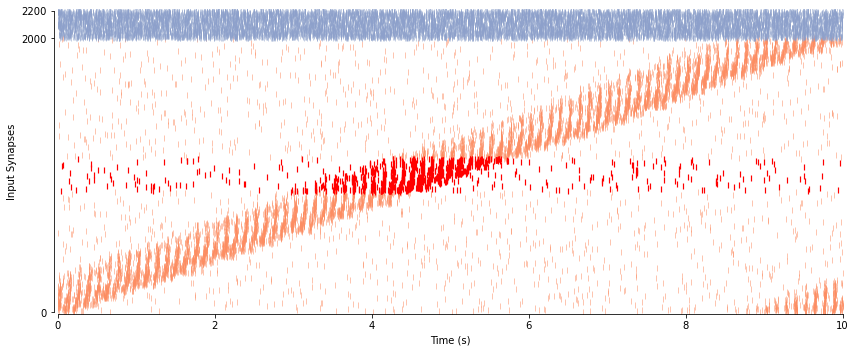

In [21]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(x=x_e_rest, y=y_e_rest, marker="|", color=cmap_categ[1], linewidth=0.5, s=40)
ax.scatter(x=x_i, y=y_i, marker="|", color=cmap_categ[2], linewidth=0.5, s=40)
ax.scatter(x=x_e_clust, y=y_e_clust, marker="|", color="red", linewidth=1.2, s=40)


ax.margins(x=0.005, y=0.005)

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_bounds(0,2200)
ax.spines.bottom.set_bounds(0,10)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_xlabel("Time (s)")
ax.set_ylabel("Input Synapses")
ax.set_yticks([0,2000,2200])

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig1/fig1_raster.pdf", bbox_inches="tight")
#plt.close()

## Dspike vs. Soma

In [3]:
dend = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy").reshape(4,1000,50001)[:,-1,:50000]
soma = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[-1,:50000]

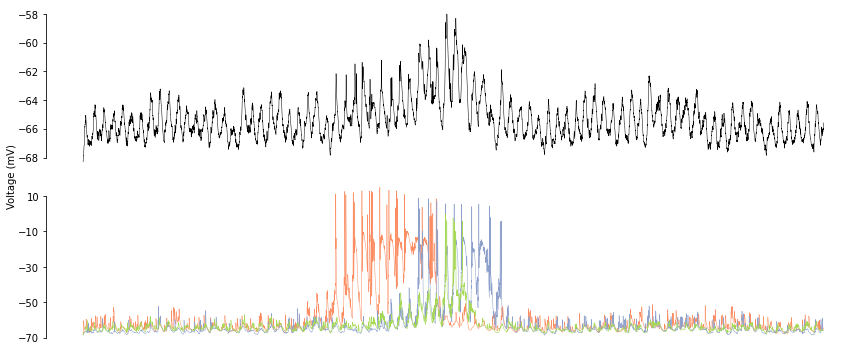

In [29]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

fig, axs = plt.subplots(nrows=2, figsize = (12,5))
axs[0].plot(soma, color="black", linewidth=0.5)
axs[1].plot(dend[0], color=cmap_categ[1], linewidth=0.5)
axs[1].plot(dend[3], color=cmap_categ[2], linewidth=0.5)
axs[1].plot(dend[2], color=cmap_categ[4], linewidth=0.5)

axs[0].spines.right.set_visible(False)
axs[0].spines.top.set_visible(False)
axs[0].spines.bottom.set_visible(False)
axs[0].spines.left.set_bounds(-68,-58)
axs[0].set_xticks([])

axs[1].spines.right.set_visible(False)
axs[1].spines.top.set_visible(False)
axs[1].spines.bottom.set_visible(False)
axs[1].spines.left.set_bounds(-70,10)
axs[1].set_xticks([])
axs[1].set_yticks([-70,-50,-30,-10,10])

fig.text(0, 0.5, 'Voltage (mV)', va='center', rotation='vertical')

fig.tight_layout()
#plt.show()
#fig.savefig("/home/sklee/dendrite/fig1/fig1_voltages.pdf", bbox_inches="tight")


## Dspike count

In [11]:
clust0 = np.load("/media/hdd01/sklee/CA1_dspike_samples/4clusterOf60_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust1 = np.load("/media/hdd01/sklee/CA1_dspike_samples/8clusterOf30_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust2 = np.load("/media/hdd01/sklee/CA1_dspike_samples/12clusterOf20_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust3 = np.load("/media/hdd01/sklee/CA1_dspike_samples/24clusterOf10_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust4 = np.load("/media/hdd01/sklee/CA1_dspike_samples/48clusterOf5_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust5 = np.load("/media/hdd01/sklee/CA1_dspike_samples/120clusterOf2_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]
clust6 = np.load("/media/hdd01/sklee/CA1_dspike_samples/240clusterOf1_vDdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep10_stimseed1.npy").reshape(-1,10,50001)[:,:,:50000]

In [27]:
all_dspikes = np.stack((clust0, clust1, clust2, clust3, clust4, clust5, clust6))
dspike_counts = np.zeros((7, 10))

for i in range(all_dspikes.shape[0]):
    for j in range(all_dspikes.shape[1]):
        for k in range(all_dspikes.shape[2]):
            v = all_dspikes[i,j,k]
            raw_idx = np.where(v > -10)[0]
            raw_count = raw_idx.shape[0]
            for s in range(raw_count):
                if s == 0:
                    dspike_counts[i,k] += 1
                elif raw_idx[s] - raw_idx[s-1] > 1:
                    dspike_counts[i,k] += 1
                    

/home/sklee/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/sklee/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


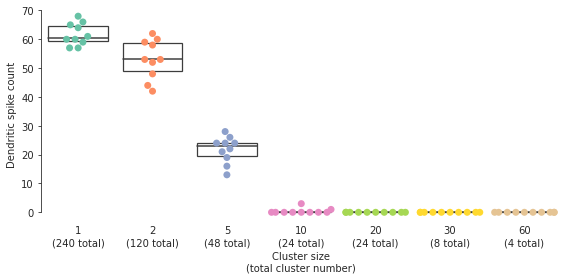

In [82]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

sns.set_style("ticks")
x_names = ["1\n(240 total)", "2\n(120 total)", "5\n(48 total)", "10\n(24 total)",
          "20\n(24 total)", "30\n(8 total)", "60\n(4 total)"]
fig = plt.figure(figsize = (8,4))
ax = sns.swarmplot(data=dspike_counts.T, palette="Set2", s=7)
ax = sns.boxplot(data=dspike_counts.T,
        showcaps=False,boxprops={'facecolor':'None', "linewidth":1.25},
        showfliers=False,whiskerprops={'linewidth':0})

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_bounds(0,70)
ax.tick_params(axis="x", length=0)
ax.set_xticklabels(x_names)

ax.set_xlabel("Cluster size\n(total cluster number)")
ax.set_ylabel("Dendritic spike count")
fig.tight_layout()

#plt.show()
#fig.savefig("/home/sklee/dendrite/fig1/fig1_dspike_counts.pdf", bbox_inches="tight")